HW9

The structure I built is modeled after a Greek amphitheater, featuring colosseum-style seating surrounding a central stage. On the stage stands a campanile-like tower, creating the impression of a performance taking place in an ancient Greek setting.

1) How are the initial conditions chosen and what geological features do they represent?

The initial conditions appear to be randomly generated, with ten hills being created and randomly placed based on their location and size. The four parameters — xx, yy, r, and h — correspond to the x and y coordinates, the radius, and the height of each hill, respectively. Together, these create a varied topography that serves as the starting surface for erosion and drainage development.

2. Have a look inside landscapeWithOcean.py and give an interpretation of the variable ‘oceanLevelParameter'

The oceanLevelParameter acts as a reference for the water level, defined as self.ZBeachLevel = Zmin + oceanLevelParameter * (Zmax - Zmin). Since (Zmax - Zmin) represents the total elevation range of the terrain, this equation determines the relative elevation at which the ocean begins. The parameter is effectively bounded between 0 and 1, where 0 would set the ocean at the lowest point in the landscape and 1 would flood the entire surface.

3. Say how the geological features change with time. What happens in the ocean?

As the simulation progresses, the peaks of the hills undergo erosion, becoming more pronounced and steep. This erosion model effectively highlights the local maxima of the terrain, as these elevated regions remain visually distinct while the surrounding areas are worn down. Meanwhile, the ocean expands and branches outward in intricate, fractal-like patterns which is an intuitive outcome, since erosion naturally facilitates the formation of rivers and streams that carve their way through the landscape.

4. Now change the simulation parameters including K, D, n, m, the ocean level. Explain the changes.

K (Erodibility Coefficient): The erodibility coefficient controls how easily material is removed by flowing water. From the simulations, the landscape with a higher K shows stronger erosion. The hills become more dissected, with finer ridges and a more granular surface texture. In contrast, with a lower K, erosion is weaker, so the lower slopes and hill bases stay more intact while the overall terrain changes more slowly.

D (Diffusion Coefficient): A larger D value causes erosion to occur more quickly overall. However, the resulting landscape appears smoother, with less granularity and more gradual transitions between elevations. The flow of water or creeks also seems slower. This makes sense because higher diffusion spreads material more evenly across the surface, reducing sharp local gradients. In other words, the landscape becomes less sensitive to local variations since material is redistributed more uniformly, leading to slower, broader changes rather than rapid, localized ones.

m (Area Exponent):
A larger m increases the influence of drainage area on erosion. In the simulations, higher m values cause major channels and valleys to deepen more significantly because areas that collect more water erode faster. This creates a more connected river network and emphasizes large-scale drainage patterns. With smaller m values, erosion is more localized and uniform across the terrain, resulting in fewer pronounced valleys and a less organized channel system.

n (Slope Exponent):
The slope exponent controls how strongly erosion depends on the steepness of the terrain. When n is larger, steeper slopes erode much faster, producing sharper ridges and more dramatic relief. The landscape becomes more rugged, with distinct high-relief features forming quickly. In contrast, a smaller n value reduces the effect of slope, leading to gentler gradients and a more evenly eroded surface.

Ocean Level Coefficient:
A higher value means a higher sea level, which causes more of the low-lying areas to flood. In the simulations, increasing this coefficient expands the ocean’s coverage and creates more branching, river-like patterns as water fills and connects nearby basins. Lower values keep most of the landscape exposed, with the ocean confined to the lowest depressions.

In [163]:
## Import necessary packages

%matplotlib inline 
# On Macs use osx
# For Windows use qt

import numpy as np
from numpy.random import rand
from landscapeWithOcean import LandscapeWithOcean # Import methods from inside file landscapeWithOcean.py

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

In [164]:
def AddHill(Z,NX,NY,xx,yy,r,h):

    for x in range(NX):
        for y in range(NY):
            dx = np.mod(x-xx+NX/2,NX)-NX/2; # difference i-i0 but apply p.b.c. 
            dy = np.mod(y-yy+NY/2,NY)-NY/2;
            dr = np.sqrt(dx**2+dy**2);
            if (dr<r):
                Z[x,y] += h * (np.cos(dr/r*np.pi/2.0))**2;

    return Z

In [165]:
### Define simulation grid and initial conditions

NX = 70*2 #number of rows
NY = 70*2 #number of columns

d  = 5 # grid spacing in meters
dx = d # keep dx=dy for simplicity
dy = d

LX=NX*dx
LY=NY*dy

# small random features in topography to begin erosion
Z = rand(NX,NY)*0.1
for i in range(5):
    xx = rand()*NX
    yy = rand()*NY
    r  = (0.1+rand())*NX
    h  = (0.1+rand())*5
    Z = AddHill(Z,NX,NY,xx,yy,r,h)

for i in range(5):
    xx = rand()*NX
    yy = rand()*NY
    r  = (0.1+rand())*NX/2
    h  = (0.5+rand())*10
    Z = AddHill(Z,NX,NY,xx,yy,r,h)

x = np.arange(NX)
y = np.arange(NY)
X,Y = np.meshgrid(y,x) #strange that y goes first !!!
ZMaxOrg = np.max(Z)
#print(ZMaxOrg)

Text(0.5, 0, 'Elevation (m)')

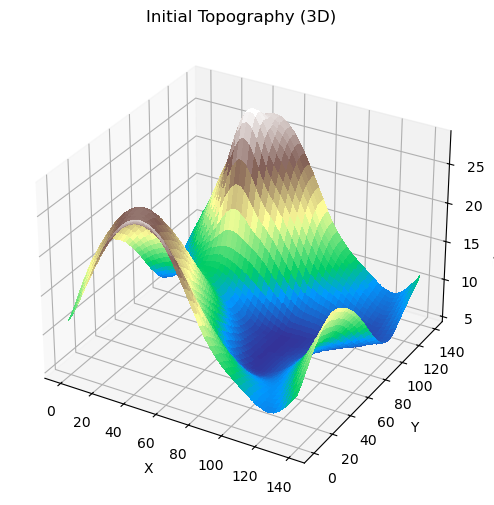

In [166]:
# --- Compare Initial vs Final ---
plt.figure(figsize=(14,6))

# Initial terrain
ax1 = plt.subplot(1, 2, 1, projection='3d')
ax1.plot_surface(X, Y, Z, cmap=cm.terrain, linewidth=0, antialiased=False)
ax1.set_title('Initial Topography (3D)')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Elevation (m)')

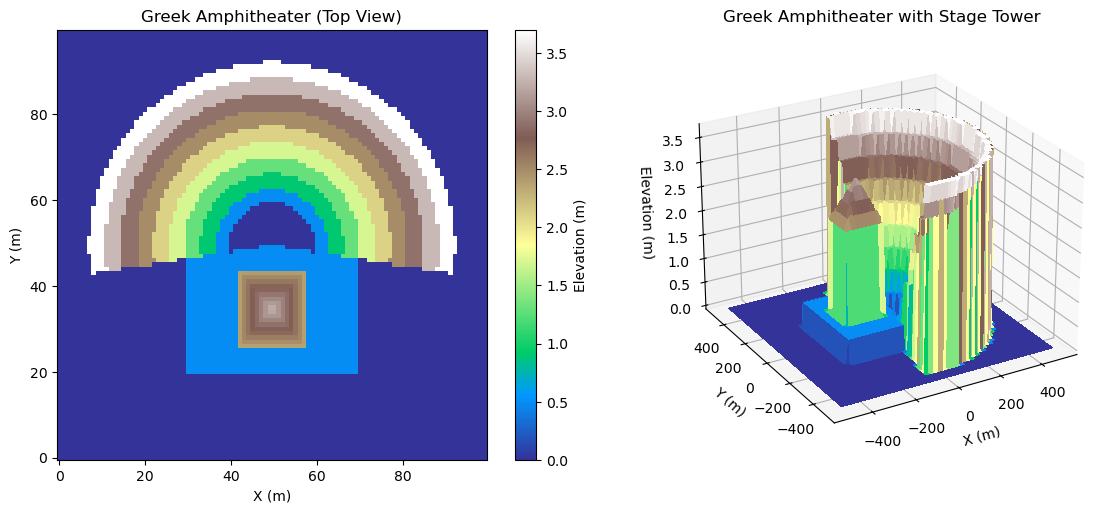

In [167]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# --- Smaller grid setup ---
NX, NY = 100, 100  # 3× smaller resolution → 9× faster
d = 10             # larger cell size (so domain is same physical size)
dx = dy = d
LX, LY = NX * dx, NY * dy
x = np.linspace(-LX/2, LX/2, NX)
y = np.linspace(-LY/2, LY/2, NY)
X, Y = np.meshgrid(x, y, indexing='ij')

# --- Initialize terrain ---
Z = np.zeros((NX, NY))

# --- Parameters ---
stage_width = 400          # width of the stage
stage_depth = 600          # depth of the stage
stage_height = 0.5         # raised stage slab
pit_radius = 100           # flat center "orchestra"
seat_start = pit_radius + 30
seat_end = seat_start + 300
num_tiers = 8              # fewer visible seat levels
step_height = 0.4
theta_open = np.pi * 1.1   # wide fan (~160°)

# --- Stage: rectangular flat area ---
stage_mask = (
    (X >= -stage_depth/2) & (X <= stage_depth/2) &
    (Y >= -stage_width/2) & (Y <= stage_width/2)
)
Z[stage_mask] = stage_height

# --- Pit (flat) ---
R = np.sqrt(X**2 + Y**2)
Theta = np.arctan2(Y, X)
pit_mask = (R < pit_radius) & (np.abs(Theta) <= theta_open / 2)
Z[pit_mask] = 0

# --- Discrete stepped seating ---
for i in range(num_tiers):
    inner = seat_start + i * ((seat_end - seat_start) / num_tiers)
    outer = seat_start + (i + 1) * ((seat_end - seat_start) / num_tiers)
    seat_mask = (R >= inner) & (R < outer) & (np.abs(Theta) <= theta_open / 2)
    height = stage_height + (i + 1) * step_height
    Z[seat_mask] = height

# --- House on top of the stage ---
top_seat_height = stage_height + num_tiers * step_height
house_height = 0.5 * top_seat_height   # half the top seating elevation
roof_height = house_height / 2         # pyramid roof height
house_base_height = stage_height

# Define house base dimensions (smaller than stage)
house_length = stage_depth * 0.3  # along X
house_width = stage_width * 0.4   # along Y

# Center position of the house (center of the stage)
center_x, center_y = -stage_depth/4, 0

# Mask for rectangular prism (the house walls)
house_mask = (
    (np.abs(X - center_x) <= house_length/2) &
    (np.abs(Y - center_y) <= house_width/2)
)

# Base of the prism (walls)
Z[house_mask] = house_base_height + house_height

# Pyramid roof (aligned with the same center)
roof_mask = (
    (np.abs(X - center_x) <= house_length/2) &
    (np.abs(Y - center_y) <= house_width/2)
)
roof_slope_x = (house_length/2 - np.abs(X - center_x)) / (house_length/2)
roof_slope_y = (house_width/2 - np.abs(Y - center_y)) / (house_width/2)
roof_shape = np.minimum(roof_slope_x, roof_slope_y)
roof = house_base_height + house_height + roof_shape * roof_height
Z[roof_mask] = np.maximum(Z[roof_mask], roof[roof_mask])

# --- Visualization ---
fig = plt.figure(figsize=(12,5))

# Top-down view
ax1 = fig.add_subplot(1,2,1)
im = ax1.imshow(Z, cmap=cm.terrain, origin='lower')
plt.colorbar(im, ax=ax1, label='Elevation (m)')
ax1.set_title('Greek Amphitheater (Top View)')
ax1.set_xlabel('X (m)')
ax1.set_ylabel('Y (m)')

# 3D view
ax2 = fig.add_subplot(1,2,2, projection='3d')
ax2.plot_surface(X, Y, Z, cmap=cm.terrain, linewidth=0, antialiased=False)
ax2.set_title('Greek Amphitheater with Stage Tower')
ax2.set_xlabel('X (m)')
ax2.set_ylabel('Y (m)')
ax2.set_zlabel('Elevation (m)')
ax2.view_init(25, 240)

plt.tight_layout()
plt.show()


In [168]:
### Physical Parameters
K = 1.0e-6 # meters^(1-2m)/yr

D = 0.005 # m^2/yr

# uplift rate
# uplift = 0.03 / 600.
uplift = 0.0

### Model parameters

# Time step
dt = d**2 / D / 8. 
#dt = d**2 / D /16. #extra small steps 
print(' dt[years] = ',dt)

#Area exponent A^m, default m=1
m=1

#gradient exponent g^n, default n=1
n=1

#erosion threshold 
theta_c = 10 

# Total simulation time
T = 1000.0 * 625.0

# total number of iterations
n_iter = int(np.round(T/dt))
print('Number of interation: ',n_iter)

# Initialize landscape 
ls = LandscapeWithOcean(NX,NY)

oceanLevelParameter=0.1  # what does this parameter do?
ls.ComputeOceanVolumeFromOceanLevelParameter(Z,NX,NY,oceanLevelParameter)

ls.pool_check(Z,NX,NY)
ls.A = np.zeros((NX,NY))

 dt[years] =  2500.0
Number of interation:  250
Minimum elevation           0.0
Maximum elevation           3.7
Beach level                 0.37000000000000005
Ocean volume                2186.6999999996688
Percentage of ocean surface 59.099999999999994


In [151]:
# Set-up figure
def init_figure():
    fig = plt.figure(figsize=(12.,6.))
    plt.show()
    return fig

def update_figure():
        plt.clf()
        ax1 = fig.add_subplot(121,projection='3d')

        # use equal x-y aspect with an explicit vertical exageration
        vert_exag = 4.
        ax1.set_xlim3d(0,max(NX,NY))
        ax1.set_ylim3d(0,max(NX,NY))
        ax1.set_zlim3d(0,ZMaxOrg)

        ax1.set_title('Surface Relief')

#        surf = ax1.plot_surface(X,Y,Z, cmap = cm.terrain, rstride=1, cstride=1,
#                antialiased=False,linewidth=0)

        ZPlot = np.copy(Z)
        ZPlot[ZPlot<ls.ZBeachLevel] = ls.ZBeachLevel 
        ZPlot -= ls.ZBeachLevel
        ax1.plot_surface(X,Y,ZPlot, cmap = cm.terrain, rstride=1, cstride=1,
                antialiased=False,linewidth=0)

        ax2 = fig.add_subplot(122,aspect='equal')
        ax2.set_title('Elevation')

        #im = ax2.pcolor(Z,cmap=cm.terrain)
        im = ax2.pcolor(ZPlot,cmap=cm.coolwarm)
        cs = ax2.contour(ZPlot,6,colors='k')

        # Add a color bar which maps values to colors.
        cbar = fig.colorbar(im, shrink=0.5, aspect=5)
        # Add the contour line levels to the colorbar
        cbar.add_lines(cs)

        #plt.show()
        plt.draw()
        plt.pause(0.0001)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, animation

# --- Initialize simulation ---
fig = init_figure()
update_figure()
Znew = np.copy(Z)
Z_init = np.copy(Z)

# Store frames for animation
frames = []
save_every = 10  # save every 10 iterations

for it in range(1, n_iter+1):
    
    ls.calculate_collection_area(Z, NX, NY)
    ls.A *= dx * dy
    
    for i in range(NX):
        iL = np.mod(i-1, NX)
        iR = np.mod(i+1, NX)

        for j in range(NY):
            jD = np.mod(j-1, NY)
            jU = np.mod(j+1, NY)
  
            if ls.ocean[i,j] > 0:
                Psi_z = 0
                Phi_z = 0
            else:
                if ls.drain[i,j] > 0:
                    s1 = (Z[iR,j] - Z[iL,j]) / (2.*dx)
                    s2 = (Z[i,jU] - Z[i,jD]) / (2.*dy)
                    s3 = (Z[iR,jD] - Z[iL,jU]) / (2.*np.sqrt(dx**2 + dy**2))
                    s4 = (Z[iR,jU] - Z[iL,jD]) / (2.*np.sqrt(dx**2 + dy**2))
                    gradient = (np.sqrt(s1**2 + s2**2) + np.sqrt(s3**2 + s4**2)) / 2.
                    Psi_z = K * (ls.A[i,j]**m * gradient**n - theta_c)

                elif ls.drainage[i,j] > 0:
                    if (Z[i,j]>=Z[iR,j]) and ls.pool[iR,j]!=ls.drainage[i,j]: 
                        gradient = (Z[i,j]-Z[iR,j])/dx
                    elif (Z[i,j]>=Z[iL,j]) and ls.pool[iL,j]!=ls.drainage[i,j]:
                        gradient = (Z[i,j]-Z[iL,j])/dx
                    elif (Z[i,j]>=Z[i,jU]) and ls.pool[i,jU]!=ls.drainage[i,j]:
                        gradient = (Z[i,j]-Z[i,jU])/dy
                    elif (Z[i,j]>=Z[i,jD]) and ls.pool[i,jD]!=ls.drainage[i,j]:
                        gradient = (Z[i,j]-Z[i,jD])/dy
                    else:
                        gradient = 0.02
                    Psi_z = K * (ls.A[i,j]**m * gradient**n - theta_c)
                else:
                    Psi_z = 0

                if Psi_z < 0:
                    Psi_z = 0

                # Diffusion term
                Phi_z = D * (
                    (Z[iR,j] - 2.*Z[i,j] + Z[iL,j]) / dx**2 +
                    (Z[i,jU] - 2.*Z[i,j] + Z[i,jD]) / dy**2
                )
           
            Znew[i,j] = Z[i,j] + (Phi_z - Psi_z + uplift) * dt  

            # Stability check
            dZdt = (Znew[i,j] - Z[i,j]) / dt
            CFL = abs(dZdt) * dt / min(dx, dy)
            if CFL > 1.0:
                print(f'\nWarning: Time step {dt} too large. Safer would be {dt/CFL:.2f}')
            
            if Znew[i,j] < 0.:
                Znew[i,j] = 0.
    
    Z = np.copy(Znew)
    ls.pool_check(Z, NX, NY)

    if it % save_every == 0:
        frames.append(Z.copy())  # store snapshot

    if np.mod(it,10) == 0: 
        print(it, end='')
        update_figure()
        print(' Ocean level=', ls.ZBeachLevel,
              ' Ocean surface fraction=', 100*ls.AOcean/(NX*NY))
    else:
        print('.', end='')

update_figure()
print('Simulation finished.')

# --- Create 2D animation of Z ---
fig, ax = plt.subplots(figsize=(7,6))
im = ax.imshow(frames[0], cmap=cm.terrain, origin='lower')
plt.colorbar(im, ax=ax, label='Elevation (m)')
ax.set_title('Landscape Evolution')

def update(frame):
    im.set_data(frame)
    return [im]

ani = animation.FuncAnimation(fig, update, frames=frames, interval=100, blit=True)

# --- Save animation as mp4 ---
ani.save('landscape_evolution_2D.mp4', writer='ffmpeg', fps=10)
plt.close(fig)

print("✅ Animation saved as 'landscape_evolution_2D.mp4'")


In [ ]:
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D  # required for 3D projection

# --- 3D animation setup ---
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Initial surface
surf = ax.plot_surface(X, Y, frames[0], cmap=cm.terrain, linewidth=0, antialiased=False)
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Elevation (m)')
ax.set_title('Landscape Evolution (3D)')
ax.view_init(elev=35, azim=240)

def update_3d(frame_idx):
    ax.cla()  # clear current 3D surface safely
    ax.plot_surface(X, Y, frames[frame_idx], cmap=cm.terrain, linewidth=0, antialiased=False)
    ax.set_xlabel('X (m)')
    ax.set_ylabel('Y (m)')
    ax.set_zlabel('Elevation (m)')
    ax.set_title(f'Landscape Evolution (3D) - Frame {frame_idx+1}/{len(frames)}')
    ax.set_zlim(np.min(frames[0]), np.max(frames[0]))
    ax.view_init(elev=35, azim=240)
    return []

ani = animation.FuncAnimation(fig, update_3d, frames=len(frames), interval=100, blit=False)

# --- Save as mp4 ---
ani.save('landscape_evolution_3D.mp4', writer='ffmpeg', fps=10)
plt.close(fig)

print("3D animation saved as 'landscape_evolution_3D.mp4'")


✅ 3D animation saved as 'landscape_evolution_3D.mp4'


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, animation

# --- Store original topography before any erosion ---
Z_original = np.copy(Z)   # baseline terrain

# --- Parameter sets to test ---
param_sets = {
    "K": [1.0e-6, 5.0e-6],
    "D": [0.002, 0.01],
    "m": [0.5, 1.5],
    "n": [0.5, 2.0],
}

# --- Loop through each parameter category ---
for param_name, values in param_sets.items():
    for val in values:
        # format value safely for print and filenames
        val_str = f"{val:.2e}" if isinstance(val, float) else str(val)
        print(f"\n=== Running simulation with {param_name} = {val_str} ===")

        # --- Reset everything to original state each run ---
        Z = np.copy(Z_original)
        Znew = np.copy(Z)
        ls = LandscapeWithOcean(NX, NY)
        ls.pool_check(Z, NX, NY)
        ls.A = np.zeros((NX, NY))

        # Copy baseline parameters
        K_curr = K
        D_curr = D
        m_curr = m
        n_curr = n

        # Override the parameter being tested
        if param_name == "K":
            K_curr = val
        elif param_name == "D":
            D_curr = val
        elif param_name == "m":
            m_curr = val
        elif param_name == "n":
            n_curr = val

        # Initialize visualization (optional)
        fig = init_figure()
        update_figure()

        frames = []
        save_every = 10

        # --- Main simulation loop ---
        for it in range(1, n_iter + 1):
            ls.calculate_collection_area(Z, NX, NY)
            ls.A *= dx * dy

            for i in range(NX):
                iL = np.mod(i - 1, NX)
                iR = np.mod(i + 1, NX)
                for j in range(NY):
                    jD = np.mod(j - 1, NY)
                    jU = np.mod(j + 1, NY)

                    if ls.ocean[i, j] > 0:
                        Psi_z = 0
                        Phi_z = 0
                    else:
                        if ls.drain[i, j] > 0:
                            s1 = (Z[iR, j] - Z[iL, j]) / (2. * dx)
                            s2 = (Z[i, jU] - Z[i, jD]) / (2. * dy)
                            s3 = (Z[iR, jD] - Z[iL, jU]) / (2. * np.sqrt(dx**2 + dy**2))
                            s4 = (Z[iR, jU] - Z[iL, jD]) / (2. * np.sqrt(dx**2 + dy**2))
                            gradient = (np.sqrt(s1**2 + s2**2) + np.sqrt(s3**2 + s4**2)) / 2.
                            Psi_z = K_curr * (ls.A[i, j]**m_curr * gradient**n_curr - theta_c)
                        elif ls.drainage[i, j] > 0:
                            if (Z[i, j]>=Z[iR, j]) and ls.pool[iR, j]!=ls.drainage[i, j]: 
                                gradient = (Z[i, j]-Z[iR, j])/dx
                            elif (Z[i, j]>=Z[iL, j]) and ls.pool[iL, j]!=ls.drainage[i, j]:
                                gradient = (Z[i, j]-Z[iL, j])/dx
                            elif (Z[i, j]>=Z[i, jU]) and ls.pool[i, jU]!=ls.drainage[i, j]:
                                gradient = (Z[i, j]-Z[i, jU])/dy
                            elif (Z[i, j]>=Z[i, jD]) and ls.pool[i, jD]!=ls.drainage[i, j]:
                                gradient = (Z[i, j]-Z[i, jD])/dy
                            else:
                                gradient = 0.02
                            Psi_z = K_curr * (ls.A[i, j]**m_curr * gradient**n_curr - theta_c)
                        else:
                            Psi_z = 0

                        if Psi_z < 0:
                            Psi_z = 0

                        Phi_z = D_curr * (
                            (Z[iR, j] - 2.*Z[i, j] + Z[iL, j]) / dx**2 +
                            (Z[i, jU] - 2.*Z[i, j] + Z[i, jD]) / dy**2
                        )

                    Znew[i, j] = Z[i, j] + (Phi_z - Psi_z + uplift) * dt

                    if Znew[i, j] < 0.:
                        Znew[i, j] = 0.

            Z = np.copy(Znew)
            ls.pool_check(Z, NX, NY)

            if it % save_every == 0:
                frames.append(Z.copy())

            if np.mod(it, 10) == 0:
                print(it, end='')
                update_figure()
                print(' Ocean level=', ls.ZBeachLevel,
                      ' Ocean surface fraction=', 100 * ls.AOcean / (NX * NY))
            else:
                print('.', end='')

        print('\nSimulation finished.')

        # --- Create 2D animation of Z ---
        fig_anim, ax = plt.subplots(figsize=(7,6))
        im = ax.imshow(frames[0], cmap=cm.terrain, origin='lower')
        plt.colorbar(im, ax=ax, label='Elevation (m)')
        ax.set_title(f'Landscape Evolution ({param_name}={val_str})')

        def update(frame):
            im.set_data(frame)
            return [im]

        ani = animation.FuncAnimation(fig_anim, update, frames=frames, interval=100, blit=True)

        # --- Save animation as mp4 ---
        filename = f'landscape_evolution_{param_name}{val_str.replace(".", "p")}.mp4'
        ani.save(filename, writer='ffmpeg', fps=10)
        plt.close(fig_anim)

        print(f"Animation saved as '{filename}'")

print("\nAll 8 simulations completed successfully.")